In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from dat_hea_reader import *
from eeg_avg import *
import scipy.signal as sig

Leemos los datos

In [2]:
path_realizacion = r'datos_ejemplo_señales\N1_evoked_raw_100_F1_R1'
fs, trials, comments = read_trials(path_realizacion)

[-54.85490417 -53.88684173 -50.66980495 ... -50.42188652 -50.43959498
 -51.77363225]


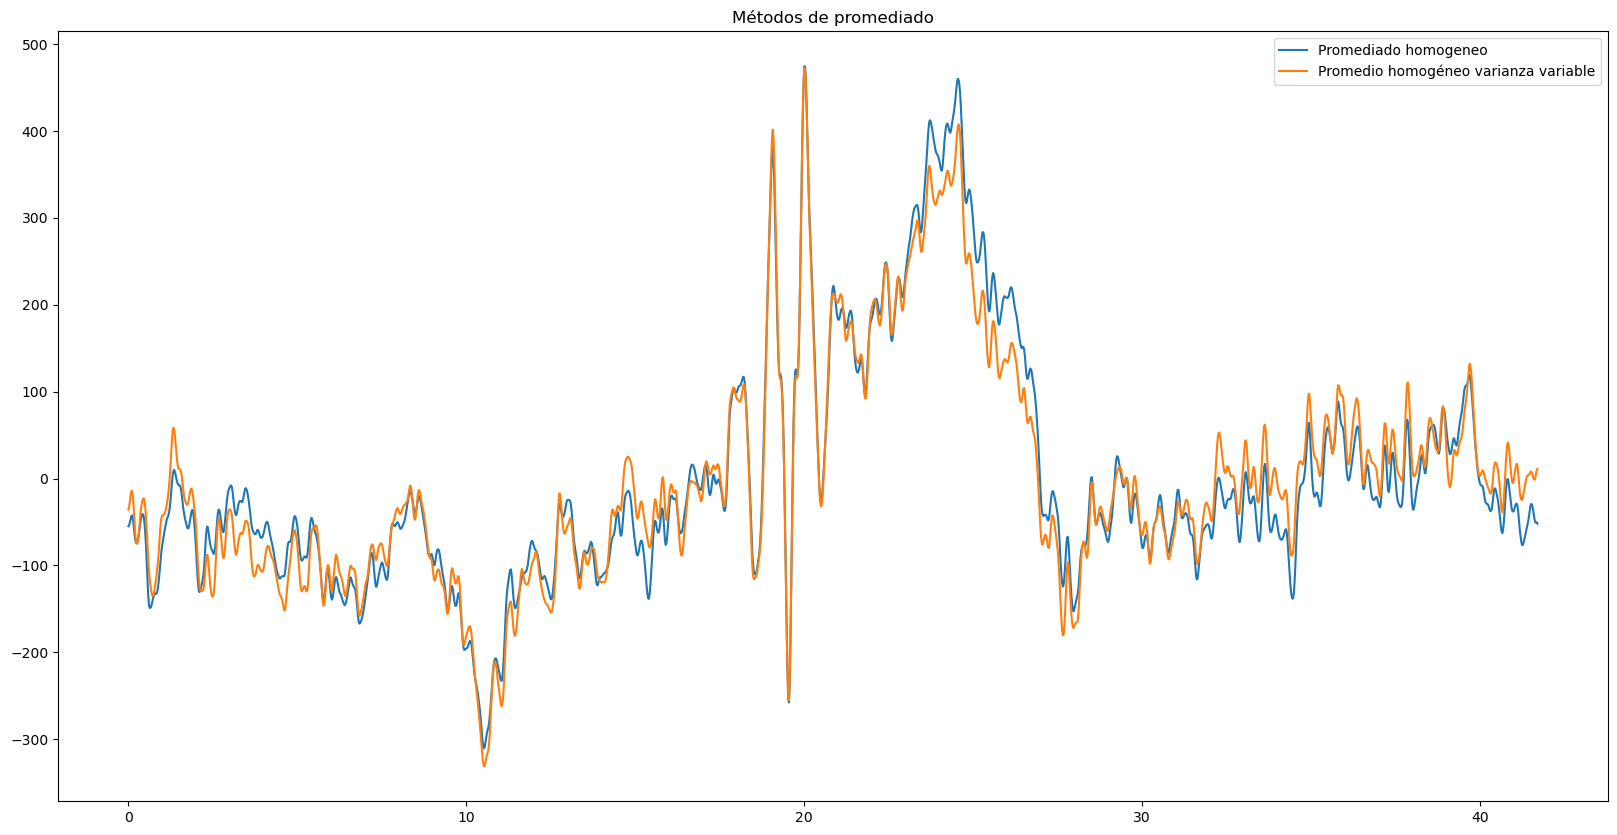

In [3]:
tr_len = comments['Trial Length (samples)']
t = np.linspace(0, tr_len/fs, tr_len)*1000 # convert to ms
trials_mean = average_EEG(trials, mode='homogenous') 
trials_amp = average_EEG(trials, mode='amp')
trials_var = average_EEG(trials, mode='var')
trials_both = average_EEG(trials, mode='both')

print(trials_mean)


plt.figure(figsize = (20,10))
plt.plot(t, trials_mean, label='Promediado homogeneo')
#plt.plot(t, trials_amp, label='Promedio inhomogéneo amplitud variable')
plt.plot(t, trials_var, label='Promedio homogéneo varianza variable')
#plt.plot(t, trials_both, label='Promedio inhomogéneo todo variable')
plt.title('Métodos de promediado')
plt.legend()
plt.show()

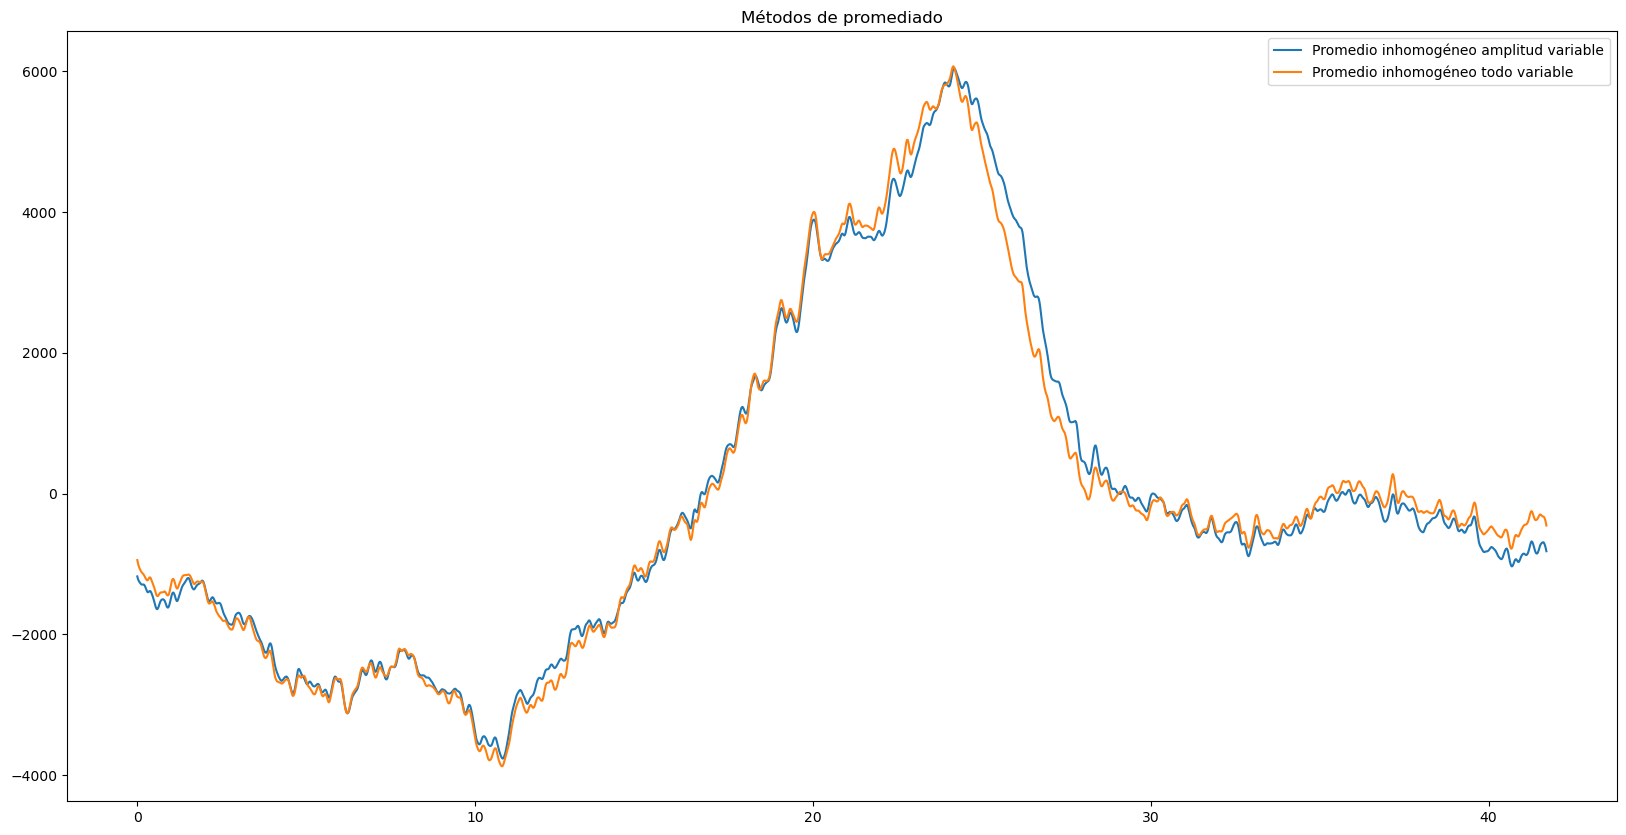

In [4]:
plt.figure(figsize = (20,10))
plt.plot(t, trials_amp, label='Promedio inhomogéneo amplitud variable')
plt.plot(t, trials_both, label='Promedio inhomogéneo todo variable')
plt.title('Métodos de promediado')
plt.legend()
plt.show()

Guardamos los promedios en un archivo .csv

In [5]:
df = pd.DataFrame({'t':t, 'mean':trials_mean, 'amp':trials_amp, 'var':trials_var, 'both':trials_both})
df.to_csv("N1_evoked_raw_100_F1_R1.csv")
df.head(10)

,t,mean,amp,var,both
0,0.000000,-54.854904,-1177.587852,-35.783080,-945.157277
1,0.020844,-53.886842,-1215.373524,-32.194680,-992.347626
2,0.041687,-50.669805,-1239.773383,-26.064426,-1029.168073
3,0.062531,-47.269781,-1256.908008,-20.437986,-1058.344303
4,0.083375,-43.722186,-1269.704862,-15.433056,-1079.837131
5,0.104219,-42.441274,-1283.805561,-13.836150,-1100.640188
6,0.125062,-44.949973,-1291.926299,-17.838624,-1116.764455
7,0.145906,-50.728833,-1293.444539,-27.209807,-1127.493244
8,0.166750,-58.662223,-1292.971417,-40.675267,-1138.361309
9,0.187594,-66.265055,-1292.725261,-55.016142,-1150.649189


(array([2.77410476e+04, 5.30092312e+04, 4.60013640e+04, ...,
        1.60126084e-05, 2.28992745e-05, 1.36386477e-05]),
 array([0.0000000e+00, 2.3976024e+01, 4.7952048e+01, ..., 2.3952048e+04,
        2.3976024e+04, 2.4000000e+04]))

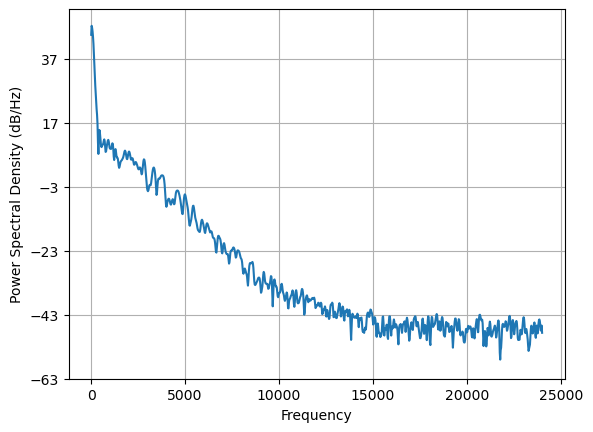

In [6]:
n = len(trials_both)
plt.psd(trials_both, NFFT=n//4, Fs=fs, window=np.bartlett(n//4), noverlap=0, pad_to=n)

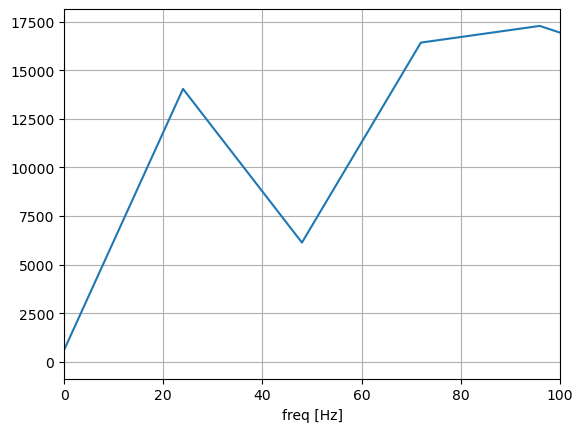

In [7]:
nperseg=nfft=n
freq, first_sig_psd = sig.welch(trials[0], nperseg=nperseg, nfft=nfft, window='hamming', noverlap=nperseg//2, fs=fs)
plt.plot(freq, first_sig_psd)
plt.xlim([0,100])
plt.xlabel('freq [Hz]')
plt.grid('on')

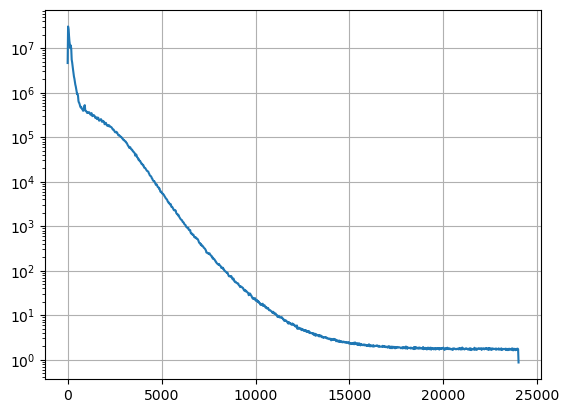

In [8]:
avg_psd = sum([sig.welch(trial, nperseg=nperseg, nfft=nfft, window='hamming', noverlap=nperseg//2, fs=fs)[1] 
               for trial in trials])
plt.semilogy(freq, avg_psd)
plt.grid('on')
